In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocessing and training

In [79]:
titanic_train=pd.read_csv('train.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


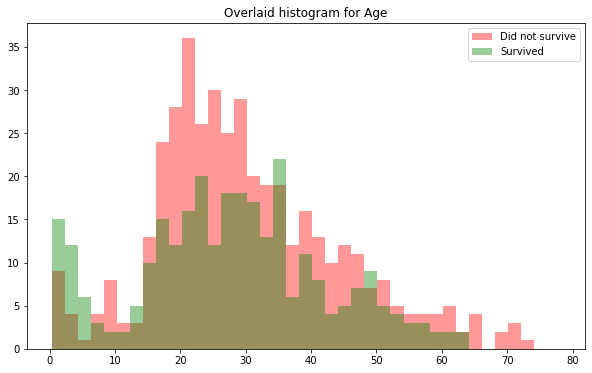

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


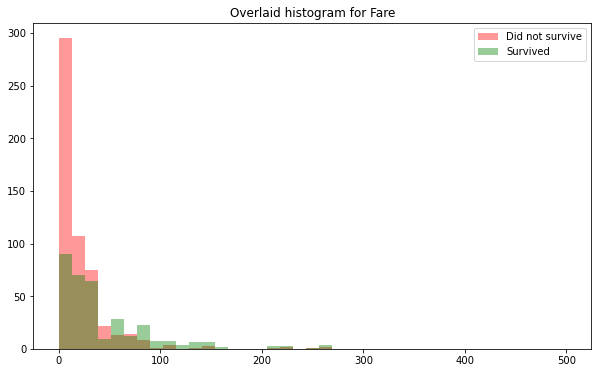

In [80]:
#As we can see from the plot people with age in 17-45 and with less fare are most likely not to survive
#Hence from the graph we observe that Age and fare play an important role in predicting wheather someone survived or not
for i in ['Age', 'Fare']:
    died = list(titanic_train[titanic_train['Survived'] == 0][i].dropna())
    survived = list(titanic_train[titanic_train['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.distplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width))
    sns.distplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width))
    plt.legend(['Did not survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()

<Figure size 720x432 with 0 Axes>

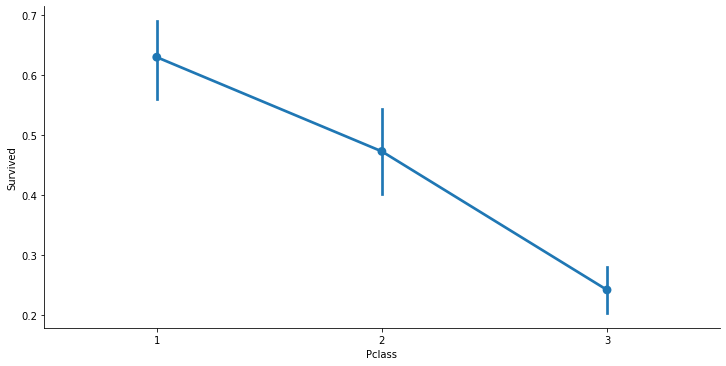

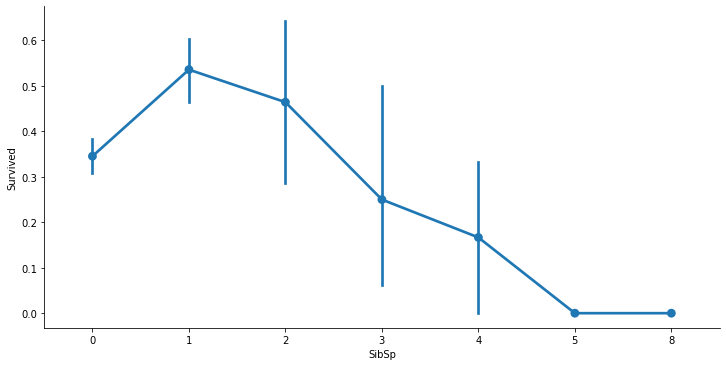

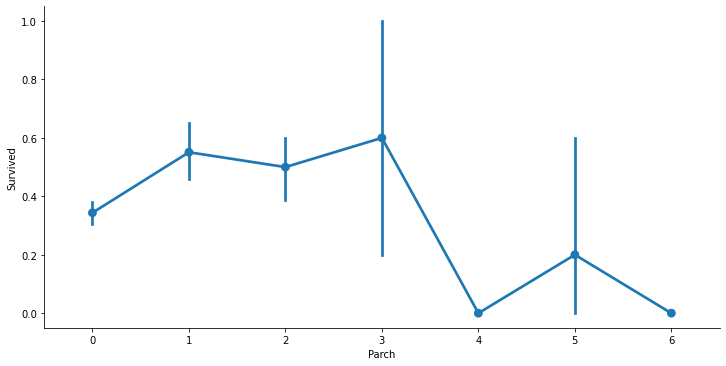

In [81]:
#As we can see from the plots a meaniful observations can be made from the plots(people with higher ticket class not likely to
#survive and also famil with more members are nnot likely to survive).
for i,col in enumerate(['Pclass','SibSp','Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic_train, kind='point', aspect=2)

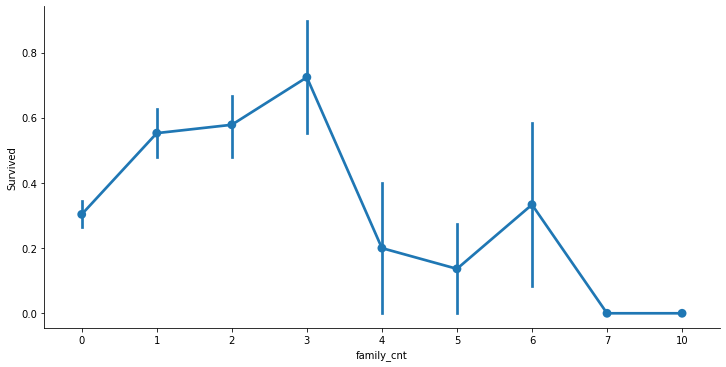

In [82]:
#Also we can see the SibSp and Parch are related in same manner to survival hence we can combine this labels to form a single
#feature called family_cnt and remove Sibsp and Parch from data
titanic_train['family_cnt']=titanic_train['SibSp']+titanic_train['Parch']
titanic_train.drop(['SibSp','Parch'],axis=1,inplace=True)
sns.catplot(x='family_cnt', y='Survived', data=titanic_train, kind='point', aspect=2)

In [83]:
#This shows that people with cabin are more likely to survive 
titanic_train.groupby(titanic_train['Cabin'].isnull()).mean()['Survived']

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [84]:
#creating cabin_ind where for cabin is present=1 and not present=0 and removing cabin variable
titanic_train['Cabin_ind'] = np.where(titanic_train['Cabin'].isnull(), 0, 1)
titanic_train.drop(['Cabin'],axis=1,inplace=True)
titanic_train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_cnt,Cabin_ind
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,330877,8.4583,Q,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,17463,51.8625,S,0,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,349909,21.0750,S,4,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,347742,11.1333,S,2,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,237736,30.0708,C,1,0


<Figure size 720x432 with 0 Axes>

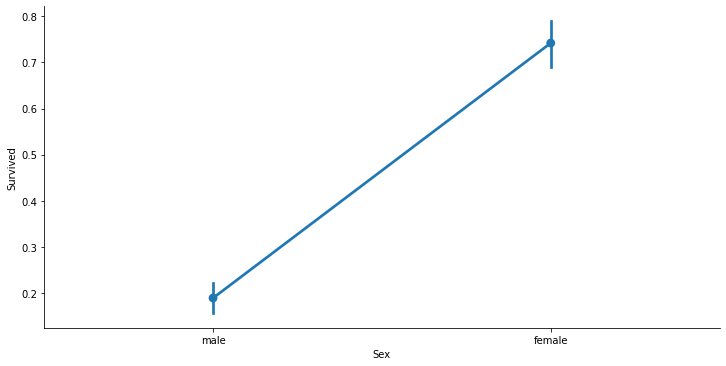

In [85]:
for i, col in enumerate(['Sex']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic_train, kind='point', aspect=2, )

In [86]:
gender_num = {'male': 0, 'female': 1}

titanic_train['Sex'] = titanic_train['Sex'].map(gender_num)
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_cnt,Cabin_ind
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,A/5 21171,7.2500,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,PC 17599,71.2833,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,STON/O2. 3101282,7.9250,S,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,113803,53.1000,S,1,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,373450,8.0500,S,0,0


In [87]:
#removing unnecessary variables
titanic_train.drop(['Name','Ticket','Embarked'],axis=1,inplace=True)
titanic_train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,family_cnt,Cabin_ind
0,1,0,3,0,22.0,7.2500,1,0
1,2,1,1,1,38.0,71.2833,1,1
2,3,1,3,1,26.0,7.9250,0,0
3,4,1,1,1,35.0,53.1000,1,1
4,5,0,3,0,35.0,8.0500,0,0


In [93]:
titanic_train=titanic_train.fillna(titanic_train['Age'].mean())

In [94]:
titanic_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
Fare           0
family_cnt     0
Cabin_ind      0
dtype: int64

In [97]:
trainx=titanic_train[['Pclass','Sex','Age','Fare','family_cnt','Cabin_ind']]
trainy=titanic_train['Survived']
print(trainx.head())
print(trainy.head())

   Pclass  Sex   Age     Fare  family_cnt  Cabin_ind
0       3    0  22.0   7.2500           1          0
1       1    1  38.0  71.2833           1          1
2       3    1  26.0   7.9250           0          0
3       1    1  35.0  53.1000           1          1
4       3    0  35.0   8.0500           0          0
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [99]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(trainx, trainy)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 4, 8, 16, 32, None],
                         'n_estimators': [5, 50, 250]})

In [100]:
cv.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=50)

In [101]:
rf1=RandomForestClassifier(random_state=42, n_estimators= 50, max_depth=8, criterion='gini')
rf1.fit(trainx,trainy)

RandomForestClassifier(max_depth=8, n_estimators=50, random_state=42)

In [102]:
test=pd.read_csv('test.csv')

In [103]:
test['family_cnt']=test['SibSp']+test['Parch']
test.drop(['SibSp','Parch'],axis=1,inplace=True)

In [104]:
test['Cabin_ind'] = np.where(test['Cabin'].isnull(), 0, 1)
test.drop(['Cabin'],axis=1,inplace=True)

In [105]:
gender_num = {'male': 0, 'female': 1}

test['Sex'] =test['Sex'].map(gender_num)
test.head()

,PassengerId,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_cnt,Cabin_ind
0,892,3,"Kelly, Mr. James",0,34.5,330911,7.8292,Q,0,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,363272,7.0000,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,240276,9.6875,Q,0,0
3,895,3,"Wirz, Mr. Albert",0,27.0,315154,8.6625,S,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,3101298,12.2875,S,2,0


In [106]:
#removing unnecessary variables
test.drop(['Name','Ticket','Embarked'],axis=1,inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,family_cnt,Cabin_ind
0,892,3,0,34.5,7.8292,0,0
1,893,3,1,47.0,7.0000,1,0
2,894,2,0,62.0,9.6875,0,0
3,895,3,0,27.0,8.6625,0,0
4,896,3,1,22.0,12.2875,2,0


In [107]:
test=test.fillna(test['Age'].mean())

In [108]:
testx=test[['Pclass','Sex','Age','Fare','family_cnt','Cabin_ind']]
print(testx.head())

   Pclass  Sex   Age     Fare  family_cnt  Cabin_ind
0       3    0  34.5   7.8292           0          0
1       3    1  47.0   7.0000           1          0
2       2    0  62.0   9.6875           0          0
3       3    0  27.0   8.6625           0          0
4       3    1  22.0  12.2875           2          0


In [109]:
ypred=rf1.predict(testx)
ypred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [111]:
test['Survived']=ypred

In [112]:
te.to_csv("op_rf.csv", index=False)

,PassengerId,Pclass,Sex,Age,Fare,family_cnt,Cabin_ind,Survived
0,892,3,0,34.50000,7.8292,0,0,0
1,893,3,1,47.00000,7.0000,1,0,0
2,894,2,0,62.00000,9.6875,0,0,0
3,895,3,0,27.00000,8.6625,0,0,0
4,896,3,1,22.00000,12.2875,2,0,0
...,...,...,...,...,...,...,...,...
413,1305,3,0,30.27259,8.0500,0,0,0
414,1306,1,1,39.00000,108.9000,0,1,1
415,1307,3,0,38.50000,7.2500,0,0,0
416,1308,3,0,30.27259,8.0500,0,0,0


In [114]:
Ans=test[['PassengerId','Survived']]

In [116]:
Ans.to_csv("Ans.csv", index=False)